**intro to data**  
This famous `iris dataset`  gives the measurements in centimeters of the variables sepal length and width and petal length and width, respectively, for 150 flowers from each of 3 species of iris. The species are Iris `setosa`, `versicolor`, and `virginica`.  
iris is a data frame with 150 cases (rows) and 5 variables (columns) named :
- `Sepal_Length`  
- `Sepal_Width`  
- `Petal_Length`  
- `Petal_Width`  
- `Species`    
  
An important part of supervised machine learning is `Classification`:finding out that what class
an observation belongs to.`Random forest classifier` is one of the most efficient algorithms in 
classification.

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data_iris = sns.load_dataset("iris")
data_iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**decision tree classifier**  
A decision tree is the building block of a random forest model.In other words , a random forest
builds many trees and predicts by using means of decision trees predictions.  
  
  We can consider decision tree as a binary tree that splits dataset into different categories
  in case of a classification problem.  
  A decision tree has 2 types of nodes:  
  - **decision nodes**: contains a yes/no question to split data.  
  - **leaf nodes**: contains the predicted class of the data.  
We can implement decision tree (and random forest) using `Scikit_Learn` library in python. 

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(3)

iris_features = ['sepal_length'  ,
                  'sepal_width'  , 
                  'petal_length',
                  'petal_width' ]

X = data_iris[iris_features]
y = data_iris.species

train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.3)
#build decision tree model

decision_tree_classifier_model = DecisionTreeClassifier(max_depth = 4)
decision_tree_classifier_model.fit(train_X , train_y)
decision_tree_predict = decision_tree_classifier_model.predict(test_X)

**Different approaches for splitting decision tree**  
**Gini impurity** :  
is a measurement that shows the probability of an incorrect classification 
of a randomly chosen datapoint in our dataset, when it  was randomly classified according to the 
distribution of class labels from the dataset.  
We can compute gini impurity of node `n` using this formula:  
$I_{G}(n) = 1-\sum_{i=1}^{J} (p_{i})^2$  
  
- J : number of all classes(in our dataset , `J` is 3).  
- $p_{i}$ : probability of class `i` in node `n`.    
  
The lowest (and best) value for gini impurity is 0.It happens when all elements of the node
belong to the same class.  
decision tree will choose the split that minimizes the gini impurity.  
  
**entropy**:  
is a measurment that shows how *mixed* the column is.  
Consider a binary classification that target column can get values `yes` and `no`.
if target column has equal amounts of `yes`s and `no`s , then entropy will be equal to `1`,
which is the highest value for entropy.We can compute entropy using this formula:  
$-\sum_{i=1}^{c} p(x_{i}) log_{2}p(x_{i})$  
  
- c : number of classes(in our case , c is 3).  
- $p_{i}$ : probability of class `i`.  
  
decision tree will choose the split that minimizes the entropy.  
  
**information gain**:  
measures **reduction in entropy** by splitting dataset on values of column we are testing.  
In other words , the higher the information gain is , the more we have reduced entropy.  
We can compute information gain using this formula:  
$IG(T,A) = Entropy(T) - \sum_{v \in A} \frac{T_{v}}{T} . Entropy(T_{v})$  
  
-`T` : Target column  
-`A` : the column we are testing  
-`v` : each value in `A`.  
  
decision tree will choose the split that maximizes the information gain.    
In this dot,we want to calculate the entropy of species column of our dataset,
using `entropy()` function from `scipy` package.  

In [50]:
from scipy.stats import entropy
counts = data_iris.species.value_counts()
print(counts)
species_entropy = entropy(counts)
print("species entropy is : {:.2f}".format(species_entropy))

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64
species entropy is : 1.10


**Random forest classifier**  
Random forest is one of the most commonly used algorithms in data science.  
Random forest is an **ensemble model**,which
means more than one model is built in the process to make the prediction.  
In other words , random forest is made up by many decision trees that can vary in depth.  
It shows that this algorithm uses **different subsets of data**
to built each decision tree , and **different subset of features** to split nodes.  
This randomness improves the performance of the model output.  

In [51]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(3)
#build random forest model

randomForest_model = RandomForestClassifier(n_estimators = 100)

randomForest_model.fit(train_X , train_y)
randomForest_predict = randomForest_model.predict(test_X)

**Decision tree vs random forest**  
Decision tree is easy to implement and has high performance on classification problems.It is also 
faster that random forest to train.However , It is prone to **overfitting**.  
Overfitting happens when our model is very flexible and perfectly matches training dataset , 
but does not match well in test dataset.  
decision tree can have *high variance* , which means that small change in data can result in a large change in stucture of tree , and also on model predictions.An easy way to prevent overfitting is 
setting a limitation for `max_depth` of the tree.  
However , random forest builds many decision trees and uses the average of all predictions to 
classify data , so it is unlikely that random forest overfits to the data.  

In [52]:
from sklearn.metrics import accuracy_score
print("decision tree accuracy: {:.2f}".format(accuracy_score(test_y , decision_tree_predict)))
print("random forest accuracy : {:.2f}".format(accuracy_score(test_y , randomForest_predict)))

decision tree accuracy: 0.96
random forest accuracy : 0.98


**Visualizing random forest result with confusion matrix**  
**confusion matrix** is used to measure the performance of a classification algorithm.  
there are 4 possible output types for confusion matrix:  
- `True Positivi(TP)` :  Model predicts that a record belongs to a specific class , and
the prediction is true.  
- `True Negative(TN)` : Model predicts that a record does not belong to a specific class ,
and the prediction is true.  
- `False Positive(FP)` :  Model predicts that a record belongs to a specific class ,
but it actually is not.This type of error is called **Type 1 error**.  
- `False Negative(FN)` : Model predicts that a record does not belong to a specific class,
but it actually is.This type of error is called **Type 2 error**.  
  
In this dot , we will visualize confusion matrix of our random forest model.  

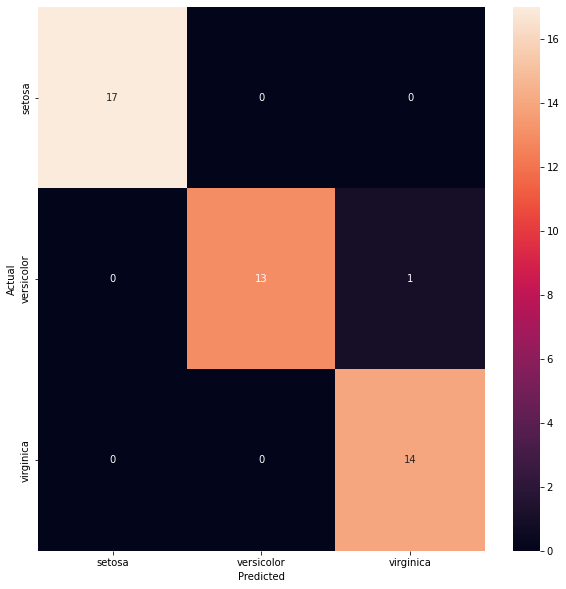

In [53]:
from sklearn.metrics import confusion_matrix

ConfusionMatrix= confusion_matrix(test_y, randomForest_predict , labels=np.unique(y))
#plot confusionMatrix
cm = pd.DataFrame(ConfusionMatrix, index=np.unique(y), columns=np.unique(y))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
fig, ax = plt.subplots(figsize=(10 , 10))
sns.heatmap(cm,annot = True, fmt='', ax=ax)
plt.show()

**Feature importance**  
For calculating feature importance score of each feature,
we use *sum of the reductions in gini impurity* of all nodes that are split on the feature. 

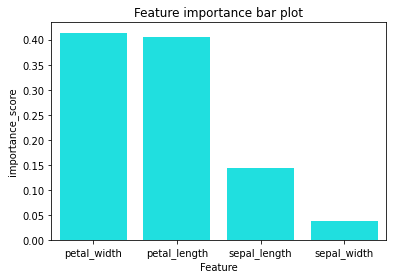

In [54]:
FI = pd.DataFrame({'Feature' : list(train_X.columns) , 'importance_score' : randomForest_model.feature_importances_}).sort_values('importance_score', ascending=False)

#create bar plot
plt.clf()
sns.barplot(data = FI, x = 'Feature' , y = 'importance_score' , color = 'cyan')
plt.title('Feature importance bar plot')
plt.show()

**Generate random forest model on selected features**  
In this dot ,we drop the least important feature(`sepal_width`) from model,to check its effect on accuracy.  
We see that the accuracy is not changed,so it has no effect on accuracy and we can drop it from model.  

In [55]:
np.random.seed(3)
#remove feature 'sepal_width' 
X2 = data_iris[['petal_length', 'petal_width' ,'sepal_length']]
y2 = data_iris['species']
train_X2 , test_X2 , train_y2 , test_y2 = train_test_split(X2 , y2 , test_size = 0.3)

#build a new random forest model with selected features
randomForest_model2 = RandomForestClassifier(n_estimators=100)
randomForest_model2.fit(train_X2 , train_y2)
randomForest2_predict = randomForest_model2.predict(test_X2)

print("random forest2 accuracy : {:.2f}".format(accuracy_score(test_y2 , randomForest2_predict)))

random forest2 accuracy : 0.98
